In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math
from matplotlib import cm
import mplhep as hep

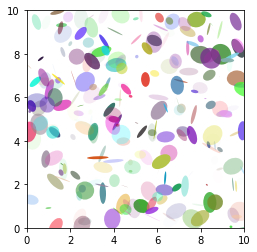

In [2]:
## example code taken from
## https://matplotlib.org/3.1.1/gallery/shapes_and_collections/ellipse_demo.html#sphx-glr-gallery-shapes-and-collections-ellipse-demo-py


NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()


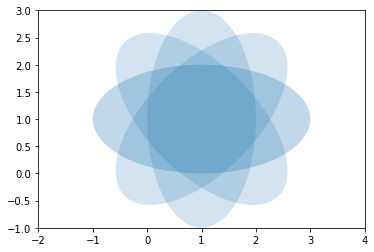

In [3]:
## example copied from
## https://matplotlib.org/3.1.1/gallery/shapes_and_collections/ellipse_demo.html#ellipse-rotated

delta = 45.0  # degrees

angles = np.arange(0, 360 + delta, delta)
ells = [Ellipse((1, 1), 4, 2, a) for a in angles]

a = plt.subplot(111, aspect='equal')

for e in ells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.1)
    a.add_artist(e)

plt.xlim(-2, 4)
plt.ylim(-1, 3)

plt.show()


In [4]:
def genLine(transverseRes=0.040,typicalSlope=0.15):
  txy = 0.035+0.15*abs(np.random.normal())
  phi = math.pi*np.random.rand()
  tx = txy*math.cos(phi)
  ty = txy*math.sin(phi)
  x = 0.040*np.random.normal()
  y = 0.040*np.random.normal()
  slope = math.sqrt(tx**2+ty**2)
  z = 0.040*np.random.normal()/slope
  p2 = np.array([x,y,z])
  v2 = np.array([tx,ty,1.])

  return p2, v2
    


In [5]:
def poca(p1,v1,p2,v2):
    v1sq = np.dot(v1,v1)
    v2sq = np.dot(v2,v2)
    v1_dot_v2 = np.dot(v1,v2)
    a = v1sq
    b = -v1_dot_v2
    c = v1_dot_v2
    d = -v2sq
    deltaP = p2 -p1
    dp_dot_v1 = np.dot(deltaP,v1)
    dp_dot_v2 = np.dot(deltaP,v2)
    det = a*d-b*c
    inverseMat = np.array([[d,-b],[-c,a]])/det
    vectA = np.array([dp_dot_v1,dp_dot_v2])
    points = np.matmul(inverseMat,vectA)

##    matA = np.array([[a,b],[c,d]])
##    sanity = np.matmul(matA,inverseMat)
##    print("sanity = ",sanity)

    r0 = points[0]
    s0 = points[1]

    L1_poca = p1 + r0*v1
    L2_poca = p2 + s0*v2
    v3 = L2_poca - L1_poca
    doca = np.sqrt(np.dot(v3,v3))
##    print("doca = ",doca)

## zhat is perpendicular to both the lines 1 and 2
    zhat = v3/doca
    v2_mag = np.sqrt(np.dot(v2,v2))
    xhat = v2/v2_mag
    yhat = np.cross(zhat,xhat)

    return r0, s0, doca, xhat, yhat, zhat


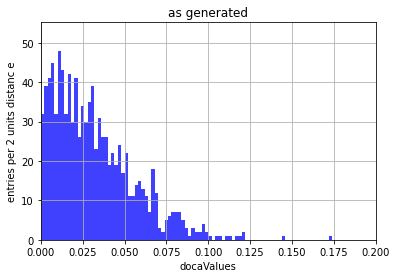

In [9]:
docaValues = []
p1 = np.array([0, 0, 0])
v1 = np.array([0, 0, 1])
for index in range(0,1000):
  p2, v2 = genLine()
  r0, s0, doca, xhat, yhat, zhat = poca(p1,v1,p2,v2)
  docaValues.append(doca)

plt.figure()
nC, binsC, patches = plt.hist(docaValues, bins=100, range=[0,0.200], density=False, facecolor="b", alpha=0.75)

plt.xlabel('docaValues')
plt.ylabel('entries per 2 units distanc e')
plt.title('as generated')
plt.axis([0,0.200,0,1.15*max(nC)])
plt.grid(True)
plt.show()
plt.close()

In [10]:
##  the error ellipsoid of the point of closest approach of L2 
##  (defined by p2 + s0*v2) along the direction (xhat,yhat,zhat)
##  [the doca vector]
##  assuming the uncertainty tranverse to the direction of L2 is
##  roadError in each direction 
def errorEllipsoid(p2, v2, s0, xhat, yhat, zhat, roadError=0.0566):
    center = p2 + s0*v2
    minorAxis_1 = roadError*zhat
    minorAxis_2 = roadError*yhat
    cosTheta = np.dot(v1,v2)/np.sqrt(np.dot(v1,v1)*np.dot(v2,v2))
    theta = math.acos(cosTheta)
    tanTheta = math.tan(theta)
    majorAxis = (roadError/tanTheta)*xhat
##    print("  ")
##    print("center = ",center)
##    print("minorAxis_1 = ",minorAxis_1)
##    print("minorAxis_2 = ",minorAxis_2)
##    print("majorAxis = ",majorAxis)
    return center, minorAxis_1, minorAxis_2, majorAxis

from https://math.stackexchange.com/questions/1865188/how-to-prove-the-parallel-projection-of-an-ellipsoid-is-an-ellipse

    Up to translation, a general ellipsoid can be written in the form

      𝐴$𝑥^2$ +𝐵$𝑦^2$+𝐶$𝑧^2$+2(𝐷𝑥𝑦+𝐸𝑥𝑧+𝐹𝑦𝑧)=1

    for some positive-definite coefficient matrix 

    $$
    \left(\begin{array}{ccc}
    A & D & E \\
    D & B & F \\
    E & F & C \\
    \end{array}\right)
    $$

    1. For definiteness, project the ellipsoid to the (𝑥,𝑦)-plane along the 𝑧-axis, and call the image the shadow. A point 𝑝=(𝑥,𝑦,𝑧) on the ellipsoid projects to the boundary of the shadow if and only if the tangent plane to the ellipsoid at 𝑝 is parallel to the 𝑧-axis, if and only if 

    $$ 
    0 = \frac{\partial}{\partial z} \left ( A x^2 + B y^2 + C z^2 + s ( D x y + E x z + F y z ) \right ) \cdot ( p - p_0) \, ,
    $$

Our ellipsoids have minor and major axes that (generally) are not parallel to the usual $ x $, $ y $, and $ z $ axes.  Let's label them as the $ u_1 $, $ u_2 $ and $ u_3 $ axes:

The surface of the ellipsoid is now defined by the equation
$$ \left ( \frac{\vec x \cdot \hat u_1}{a} \right )^2 +  
   \left ( \frac{\vec x \cdot \hat u_2}{b} \right )^2 +
   \left ( \frac{\vec x \cdot \hat u_3}{c} \right )^2  = 1
$$
where 
$$ a = | minorAxis_1 | $$
$$ b = | minorAxis_2 | $$
$$ c = | majorAxis | $$

This leads us to define
$$ \vec u_1 = \hat u1 / | minorAxis_1 | $$
$$ \vec u_2 = \hat u2 / | minorAxis_2 | $$
$$ \vec u_3 = \hat u_3 / | majorAxis | $$

With this notation, the equation for the ellipse becomes

$$ (\vec x \cdot \vec u_1)^2 + ( \vec x \cdot u_2)^2 +
   (\vec x \cdot \vec u_3)^2 = 1
   $$
   
  and writing the corrdinates of a point as $ \vec x = (x, y, z) $ it becomes
  
  $$ (x \, u_{1x} + y \, u _{1y} + z \, u_{1z})^2 +
     (x \, u_{2x} + y \, u _{2y} + z \, u_{2z})^2 +
     (x \, u_{3x} + y \, u _{3y} + z \, u_{3z})^2  = 1
  $$
  
  or
  
  $$ \begin{array}{ccc}
    (u_{1x}^2 + u_{2x}^2 + u_{3x}^2) \, x^2 & + & \\
    (u_{1y}^2 + u_{2y}^2 + u_{3y}^2) \, y^2 & + & \\
    (u_{1z}^2 + u_{2z}^2 + u_{3z}^2) \, z^2 & + & \\
    2 \left ( u_{1x}u_{1y} + u_{2x}u_{2y} + u_{3x}u_{3y} \right ) xy & + & \\
    2 \left ( u_{1y}u_{1z} + u_{2y}u_{2z} + u_{3y}u_{3z} \right ) yz & + & \\
    2 \left ( u_{1z}u_{1x} + u_{2z}u_{2x} + u_{3z}u_{3x} \right ) zx & = & 1
     \end{array}
  $$
  
  from which we can extract the forms of $ A $, $ B $, etc.:
  
  $$ \begin{array}{ccc}
       A & = & u_{1x}^2 + u_{2x}^2 + u_{3x}^2 \\
       B & = & u_{1y}^2 + u_{2y}^2 + u_{3y}^2 \\
       C & = & u_{1z}^2 + u_{2z}^2 + u_{3z}^2  \\
       D & = & u_{1x}u_{1y} + u_{2x}u_{2y} + u_{3x}u_{3y} \\
       E & = & u_{1z}u_{1x} + u_{2z}u_{2x} + u_{3z}u_{3x} \\
       F & = & u_{1y}u_{1z} + u_{2y}u_{2z} + u_{3y}u_{3z} \\
     \end{array}
  $$

In [13]:
def six_ellipsoid_parameters(majorAxis,minorAxis_1,minorAxis_2):
    
## takes ellipsoid axes in Cartesian coordinates and returns'
## six coefficients that describe the surface of the ellipsoid
## as
## (see https://math.stackexchange.com/questions/1865188/how-to-prove-the-parallel-projection-of-an-ellipsoid-is-an-ellipse)
##
##   A x^2 + B y^2 + C z^2 + 2(Dxy + Exz +Fyz) = 1
##
## note that this notation is NOT universal; the wikipedia article at
## https://en.wikipedia.org/wiki/Ellipse usses a similar, but different 
## in detail, notation.

  mag_1 = np.sqrt(np.dot(minorAxis_1,minorAxis_1))
  u1_hat = minorAxis_1/mag_1
  mag_2 = np.sqrt(np.dot(minorAxis_2,minorAxis_2))
  u2_hat = minorAxis_2/mag_2
  mag_3 = np.sqrt(np.dot(majorAxis,majorAxis))
  u3_hat = majorAxis/mag_3

  u1 = u1_hat/mag_1
  u2 = u2_hat/mag_2
  u3 = u3_hat/mag_3

  A = u1[0]*u1[0] + u2[0]*u2[0] + u3[0]*u3[0]
  B = u1[1]*u1[1] + u2[1]*u2[1] + u3[1]*u3[1]
  C = u1[2]*u1[2] + u2[2]*u2[2] + u3[2]*u3[2]
  D = u1[0]*u1[1] + u2[0]*u2[1] + u3[0]*u3[1]
  E = u1[2]*u1[0] + u2[2]*u2[0] + u3[2]*u3[0]
  F = u1[1]*u1[2] + u2[1]*u2[2] + u3[1]*u3[2]
  
  return A, B, C, D, E ,F

The parallel projection of an eillipsoid described using the formalism with variables
$ A, B, C, D, E, F $ onto the (x,y) axis produces the equation of an ellipse

$$ \alpha \, x^2 + \beta \, y^2 + \gamma \, xy = \delta $$

with

$$ \begin{array}{ccl}
  \alpha & = &  C A -  E^2 \\
  \beta  & = &  C B - F^2 \\
  \gamma & = & 2\,( C D - EF) \\
  \delta & = & C \\
 \end{array}
$$


In [14]:
def xy_parallel_projection(A, B, C, D, E ,F):
    alpha_xy = C*A - E*E
    beta_xy  = C*B - F*F
    gamma_xy =  - 2*(C*D - E*F)  ## 200901 calculation
    delta_xy = C
    
    return alpha_xy, beta_xy, gamma_xy, delta_xy

In [15]:
## as a test of code below, set gamma to zero
##gamma_xy = 0

The Ellipse() method from matplotlib.patches takes the length of the major and minor axes plus the angle (in degrees) as arguments. If my algebra is correct, we can calculate the length of the axes as $ a $ and $ b $ and the angle $ \theta $ from $ \alpha, \, \beta, \, \gamma, $ and
$ \delta $ using

$$
\begin{array}{ccc}
  \theta      & = & \tan^{-1}\sqrt{\frac{\beta}{\alpha}} \\
    a^2, \, b^2 & = & \frac{\beta \pm \sqrt{ \beta^2 - \frac{4 \beta \delta}{(\alpha+\beta)}} }
    {2 \sqrt{ \frac{\beta}{\alpha+\beta}   }}  \\
  a      & = & \sqrt{a^2} \\
  b      & = & \sqrt{b^2} \\
\end{array}
$$


where $ a^2 $ is the larger of the two solutions to the quadratic equation and $ b^2 $ is the smaller.

In [16]:
## let's try the wikipedia formulas, taken from
## https://en.wikipedia.org/wiki/Ellipse
## and accounting for the different meaning of the
## parameters (A, B, C, D, E, F) used here and there
def ellipse_parameters_for_plotting(alpha_xy,beta_xy,gamma_xy,delta_xy):

  sqrt_term = math.sqrt( (alpha_xy-beta_xy)**2 + gamma_xy**2)
  numerator_A = 2*(4*alpha_xy*beta_xy-gamma_xy**2)*delta_xy
  numerator_B_plus  = alpha_xy+beta_xy+sqrt_term
  numerator_B_minus = alpha_xy+beta_xy-sqrt_term
  denominator = (4*alpha_xy*beta_xy-gamma_xy**2)
  a = math.sqrt(numerator_A*numerator_B_plus)/denominator
  b = math.sqrt(numerator_A*numerator_B_minus)/denominator
  if (0 != gamma_xy):
    theta = math.atan( (beta_xy - alpha_xy - sqrt_term)/gamma_xy )
  if (0 == gamma_xy) & (A<C):
    theta = 0
  if (0 == gamma_xy) & (A>C):
    theta = 0.5*math.pi

## the Ellipse() method in matplotlib.patches wants andgles in degrees
  return a, b, 180.*theta/math.pi  

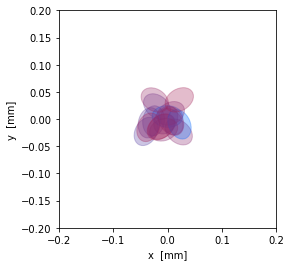

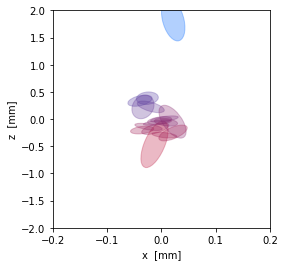

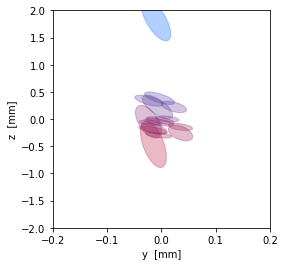

In [17]:
ells = []
ells_xz = []
ells_yz = []
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
red_0 = 25/256
green_0 = 82/256
blue_0 = 100/256
myColorRed = []
myColorRed   = np.array([0xff, 0xf2, 0xe6, 0xd9, 0xcc, 0xbf, 0xb2, 0xa6, 0x99, 0x8c, 0x80,
                0x73, 0x66, 0x59, 0x4d, 0x40, 0x33, 0x26, 0x19, 0x0d, 0x00])
myColorGreen = np.array([0x00, 0x05, 0x0a, 0x0f, 0x14, 0x1a, 0x1f, 0x24, 0x29, 0x2e, 0x33,
                0x38, 0x3d, 0x42, 0x47, 0x4c, 0x52, 0x57, 0x5c, 0x61, 0x66])
myColorBlue  = np.array([0x00, 0x0d, 0x1a, 0x26, 0x33, 0x40, 0x4c, 0x59, 0x66, 0x73, 0x80,
                0x8c, 0x99, 0xa6, 0xb2, 0xbf, 0xcc, 0xd9, 0xe6, 0xf2, 0xff])
myColorRed = myColorRed/256
myColorBlue = myColorBlue/256
myColorGreen = myColorGreen/256

for index in range(0,17):
  p1 = np.array([0,0,0])
  v1 = np.array([0,0,1])
  p2, v2 = genLine()
  r0, s0, doca, xhat, yhat, zhat = poca(p1,v1,p2,v2)
  center, minorAxis_1, minorAxis_2, majorAxis = errorEllipsoid(p2, v2, s0, xhat, yhat, zhat, roadError=0.040)
 
    
  A, B, C, D, E ,F = six_ellipsoid_parameters(majorAxis,minorAxis_1,minorAxis_2)

## the next two lines produce the parameters used to draw the ellipse of the
## parallel projection of the ellipsoid onto the (x,y) plane
  alpha_xy, beta_xy, gamma_xy, delta_xy = xy_parallel_projection(A, B, C, D, E ,F)
  a, b, theta = ellipse_parameters_for_plotting(alpha_xy,beta_xy,gamma_xy,delta_xy)

## the next two lines produce the parameters used to draw the ellipse of the
## parallel projection of the ellipsoid onto the (x,z) plane
  alpha_xz, beta_xz, gamma_xz, delta_xz = xy_parallel_projection(A, C, B, E, D, F)
  a_xz, b_xz, theta_xz = ellipse_parameters_for_plotting(alpha_xz,beta_xz,gamma_xz,delta_xz)


## the next two lines produce the parameters used to draw the ellipse of the
## parallel projection of the ellipsoid onto the (y,z) plane
  alpha_yz, beta_yz, gamma_yz, delta_yz = xy_parallel_projection(B, C, A, F, D, E)
  a_yz, b_yz, theta_yz = ellipse_parameters_for_plotting(alpha_yz,beta_yz,gamma_yz,delta_yz)


  L2 = p2 + s0*v2
  delta_z = L2[2] - p1[2]
  colorIndex = 10 + math.floor(10 * (delta_z) )
  colorIndex = max(0,colorIndex)
  colorIndex = min(20,colorIndex)
##  print("colorIndex = ", colorIndex)

  thisEllipse = Ellipse(center, a, b, theta,color=(myColorRed[colorIndex], 
                        myColorGreen[colorIndex],myColorBlue[colorIndex]))
  ells.append(thisEllipse)

##
  center_xz = [center[0], center[2]]
  xzEllipse = Ellipse(center_xz, a_xz, b_xz, theta_xz,color=(myColorRed[colorIndex], 
                        myColorGreen[colorIndex],myColorBlue[colorIndex]))
  ells_xz.append(xzEllipse)
##
  center_yz = [center[1], center[2]]
  yzEllipse = Ellipse(center_yz, a_yz, b_yz, theta_yz,color=(myColorRed[colorIndex], 
                        myColorGreen[colorIndex],myColorBlue[colorIndex]))
  ells_yz.append(yzEllipse)
    
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.3)
##    e.set_facecolor(.18, .31, .31)

ax.set_xlim(-0.2,0.2)
ax.set_ylim(-0.2,0.2)
ax.set_xlabel('x  [mm]')
ax.set_ylabel('y  [mm]')

plt.show()

fig, ax = plt.subplots(subplot_kw={'aspect': 0.10})
for e in ells_xz:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.3)

ax.set_xlim(-0.2,0.2)
ax.set_ylim(-2.0,2.0)
ax.set_xlabel('x  [mm]')
ax.set_ylabel('z  [mm]')

plt.show()

fig, ax = plt.subplots(subplot_kw={'aspect': 0.10})
for e in ells_yz:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.3)

ax.set_xlim(-0.2,0.2)
ax.set_ylim(-2.0,2.0)
ax.set_xlabel('y  [mm]')
ax.set_ylabel('z  [mm]')

plt.show()

  

In [18]:
def genPV(p1,v1,nTracks,myColorRed,myColorGreen,myColorBlue):
  ells_xy = []
  ells_xz = []
  ells_yz = []
##
  centers = []
  minors1 = []
  minors2 = []
  majors  = []
  for index in range(0,nTracks):
    p2, v2 = genLine()
    r0, s0, doca, xhat, yhat, zhat = poca(p1,v1,p2,v2)
    center, minorAxis_1, minorAxis_2, majorAxis = errorEllipsoid(p2, v2, s0, xhat, yhat, zhat, roadError=0.0566)

    minors1.append(minorAxis_1)
    minors2.append(minorAxis_2)
    majors.append(majorAxis)
## calculate the volume of the ellipsoid (up to a constant)    
    volume = np.sqrt(np.dot(minorAxis_1,minorAxis_1) + np.dot(minorAxis_2,minorAxis_2) + np.dot(majorAxis,majorAxis))
##    print("volume = ", volume)
    intensity = 0.05 + 0.15*(1./volume)
    intensity = min(intensity,1.0)
##    print("intensity = ",intensity)
    
    A, B, C, D, E ,F = six_ellipsoid_parameters(majorAxis,minorAxis_1,minorAxis_2)

## the next two lines produce the parameters used to draw the ellipse of the
## parallel projection of the ellipsoid onto the (x,y) plane
    alpha_xy, beta_xy, gamma_xy, delta_xy = xy_parallel_projection(A, B, C, D, E ,F)
    a, b, theta = ellipse_parameters_for_plotting(alpha_xy,beta_xy,gamma_xy,delta_xy)
    

## the next two lines produce the parameters used to draw the ellipse of the
## parallel projection of the ellipsoid onto the (x,z) plane
    alpha_xz, beta_xz, gamma_xz, delta_xz = xy_parallel_projection(A, C, B, E, D, F)
    a_xz, b_xz, theta_xz = ellipse_parameters_for_plotting(alpha_xz,beta_xz,gamma_xz,delta_xz)


## the next two lines produce the parameters used to draw the ellipse of the
## parallel projection of the ellipsoid onto the (y,z) plane
    alpha_yz, beta_yz, gamma_yz, delta_yz = xy_parallel_projection(B, C, A, F, D, E)
    a_yz, b_yz, theta_yz = ellipse_parameters_for_plotting(alpha_yz,beta_yz,gamma_yz,delta_yz)


    L2 = p2 + s0*v2
    delta_z = L2[2] - p1[2]
    colorIndex = 10 + math.floor(10 * (delta_z) )
    colorIndex = max(0,colorIndex)
    colorIndex = min(20,colorIndex)
##  print("colorIndex = ", colorIndex)
##. mds Sept. 4, add p1
    center = center + p1
    centers.append(center)
    thisEllipse = Ellipse(center, a, b, theta,color=(myColorRed[colorIndex], 
                        myColorGreen[colorIndex],myColorBlue[colorIndex]),alpha=intensity)
    ells_xy.append(thisEllipse)

##
    center_xz = [center[0], center[2]]
    xzEllipse = Ellipse(center_xz, a_xz, b_xz, theta_xz,color=(myColorRed[colorIndex], 
                        myColorGreen[colorIndex],myColorBlue[colorIndex]),alpha=intensity)
    ells_xz.append(xzEllipse)
##
    center_yz = [center[1], center[2]]
    yzEllipse = Ellipse(center_yz, a_yz, b_yz, theta_yz,color=(myColorRed[colorIndex], 
                        myColorGreen[colorIndex],myColorBlue[colorIndex]),alpha=intensity)
    ells_yz.append(yzEllipse)
    
 
##  return ells_xy, ells_xz, ells_yz, centers
  return ells_xy, ells_xz, ells_yz, centers, minors1, minors2, majors

In [19]:
## this function takes the positions p1 and p2  plus the minor axes m1 and m2 and 
## the major axis of the error ellipsoid associated with p2 as the inputs. It
## returns the chi-square value  of the distance-of-closest-approach and the
## associated probability value exp( -1/2 chisq) [ignoring (2*pi)^{3/2}]
def calcProb(p1,p2,m1,m2,ma):
    xvec = p2-p1
    magsqm1 = np.dot(m1,m1)
    magsqm2 = np.dot(m2,m2)
    magsqma = np.dot(ma,ma)
    u1 = m1/np.sqrt(magsqm1)
    u2 = m2/np.sqrt(magsqm2)
    u3 = ma/np.sqrt(magsqma)
    chisq = np.square(np.dot(xvec,u1))/magsqm1 + np.square(np.dot(xvec,u2))/magsqm2 + np.square(np.dot(xvec,u3))/magsqma
    prob = math.exp(-0.5*chisq)
   
    return chisq, prob 
    

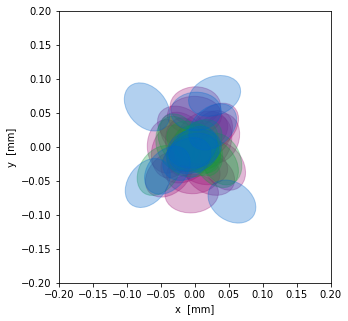

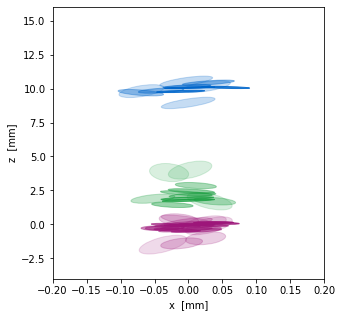

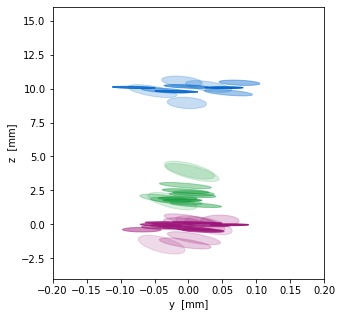

In [56]:
ells = []
ells_xz = []
ells_yz = []
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
red_0 = 25/256
green_0 = 82/256
blue_0 = 100/256
myColorRed = []
myColorRed   = np.array([0xff, 0xf2, 0xe6, 0xd9, 0xcc, 0xbf, 0xb2, 0xa6, 0x99, 0x8c, 0x80,
                0x73, 0x66, 0x59, 0x4d, 0x40, 0x33, 0x26, 0x19, 0x0d, 0x00])
myColorGreen = np.array([0x00, 0x05, 0x0a, 0x0f, 0x14, 0x1a, 0x1f, 0x24, 0x29, 0x2e, 0x33,
                0x38, 0x3d, 0x42, 0x47, 0x4c, 0x52, 0x57, 0x5c, 0x61, 0x66])
myColorBlue  = np.array([0x00, 0x0d, 0x1a, 0x26, 0x33, 0x40, 0x4c, 0x59, 0x66, 0x73, 0x80,
                0x8c, 0x99, 0xa6, 0xb2, 0xbf, 0xcc, 0xd9, 0xe6, 0xf2, 0xff])
myColorRed = myColorRed/256
myColorBlue = myColorBlue/256
myColorGreen = myColorGreen/256

myPurpleRed = 158/256*np.ones(21)
myPurpleGreen = 22/256*np.ones(21)
myPurpleBlue = 122/256*np.ones(21)

myGreenRed = 22/256*np.ones(21)
myGreenGreen = 158/256*np.ones(21)
myGreenBlue = 61/256*np.ones(21)

myBlueRed = 0/256*np.ones(21)
myBlueGreen = 102/256*np.ones(21)
myBlueBlue = 204/256*np.ones(21)


## create a PV at [0,0,0] with 21 tracks
p1 = np.array([0,0,0])
v1 = np.array([0,0,1])
ells, ells_xz, ells_yz, centers, minors1, minors2, majors = genPV(p1,v1,21,myPurpleRed,myPurpleGreen,myPurpleBlue)
##ells, ells_xz, ells_yz, centers = genPV(p1,v1,17,myPurpleRed,myPurpleGreen,myPurpleBlue)

## and now a second PV at [0,0,2] with 12 tracks
p1_b = np.array([0,0,2])
v1_b = np.array([0,0,1])
ells_b, ells_xz_b, ells_yz_b, centers_b, minors1_b, minors2_b, majors_b = genPV(p1_b,v1_b,12,myGreenRed,myGreenGreen,myGreenBlue)
ells.extend(ells_b)
ells_xz.extend(ells_xz_b)
ells_yz.extend(ells_yz_b)

## and now a third PV at [0,0,8] with 11 tracks
p1_b = np.array([0,0,10])
v1_b = np.array([0,0,1])
ells_c, ells_xz_c, ells_yz_c, centers_c, minors1_c, minors2_c, majors_c = genPV(p1_b,v1_b,11,myBlueRed,myBlueGreen,myBlueBlue)
ells.extend(ells_c)
ells_xz.extend(ells_xz_c)
ells_yz.extend(ells_yz_c)

 
chisq_values = []
prob_values = []
for ii in range(len(centers)):
    chisq, prob = calcProb(p1,centers[ii],minors1[ii],minors2[ii],majors[ii])
##    print("chisq, prob  = %5.3f %5.3f " %(chisq,prob))
    chisq_values.append(chisq)
    prob_values.append(prob) 
   

##print("  ")

chisq_values_b = []
prob_values_b = []
for ii in range(len(centers_b)):
    chisq, prob = calcProb(p1_b,centers_b[ii],minors1_b[ii],minors2_b[ii],majors_b[ii])
##    print("chisq, prob  = %5.3f %5.3f " %(chisq,prob))
    chisq_values_b.append(chisq)
    prob_values_b.append(prob) 
    
    
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.3)
##    e.set_facecolor(.18, .31, .31)

ax.set_xlim(-0.2,0.2)
ax.set_ylim(-0.2,0.2)
ax.set_xlabel('x  [mm]')
ax.set_ylabel('y  [mm]')

plt.show()

fig, ax = plt.subplots(subplot_kw={'aspect': 0.02})
for e in ells_xz:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
##    e.set_alpha(0.3)

ax.set_xlim(-0.2,0.2)
ax.set_ylim(-4.0,16.0)
ax.set_xlabel('x  [mm]')
ax.set_ylabel('z  [mm]')

plt.show()

fig, ax = plt.subplots(subplot_kw={'aspect': 0.02})
for e in ells_yz:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
##    e.set_alpha(0.3)

ax.set_xlim(-0.2,0.2)
ax.set_ylim(-4.0,16.0)
ax.set_xlabel('y  [mm]')
ax.set_ylabel('z  [mm]')

plt.show()

##


testPoint =  [-0.03765266 -0.03947724 -1.48678975]
len(x) =  10
len(z) =  160


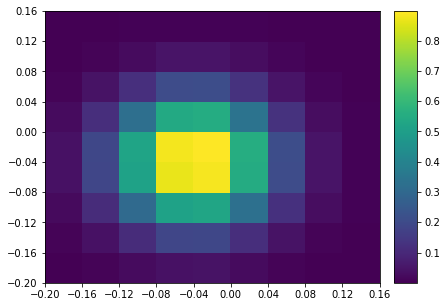

len(KDE) =  160


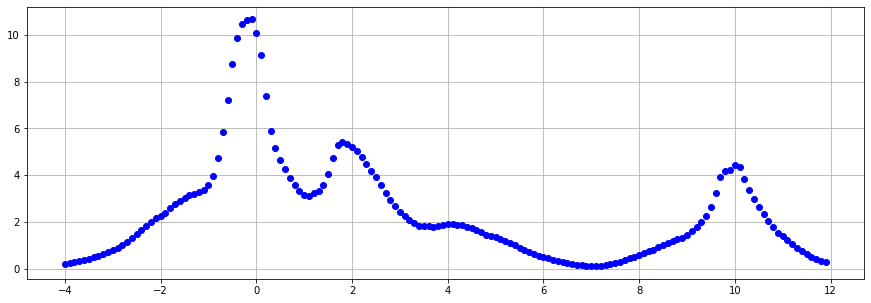

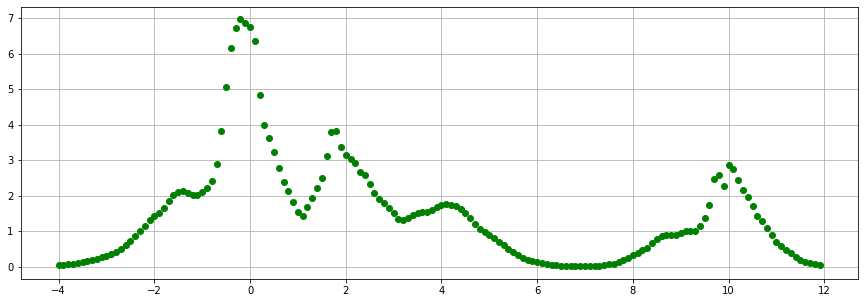

In [57]:
testPoint = centers[3]
testM1    = minors1[3]
testM2    = minors2[3]
testMa    = majors[3]
print("testPoint = ",testPoint)

xstep = 0.040
xmin  = -0.2
xmax= 0.2

ystep = 0.040
ymin  = -0.2
ymax= 0.2

zstep =  0.1
zmin  = -4.0
zmax  =  12.0


x = np.arange(xmin,xmax,xstep)
y = np.arange(ymin,ymax,ystep)
z = np.arange(zmin,zmax,zstep)
print("len(x) = ",len(x))
print("len(z) = ",len(z))
voxels = np.zeros((len(x),len(y),len(z)))
voxels_A = np.zeros((len(x),len(y),len(z)))


for ii in range(len(x)):
    for jj in range(len(y)):
        for kk in range(len(z)):
            x_c = xmin+(ii+0.5)*xstep
            y_c = ymin+(jj+0.5)*ystep
            z_c = zmin+(kk+0.5)*zstep
            thisPoint = np.array([x_c,y_c,z_c]) 
            chisq, prob = calcProb(thisPoint,testPoint,testM1,testM2,testMa)
            voxels[ii][jj][kk] =  voxels[ii][jj][kk] + prob
            voxels_A[ii][jj][kk] =  voxels_A[ii][jj][kk] + prob*prob
            
##            if (prob>0.05):
##                print("ii,jj,kk = ",ii,jj,kk)
##                print("x_c, y_c, z_c, prob = %5.3f %5.3f %5.3f %5.3f" %(x_c, y_c, z_c, prob))

z_c = testPoint[2]
##print("z_c = %5.2f" %z_c)
z_index = int(np.floor((z_c-zmin)/zstep))
##print("z_index = ",z_index)
z_edge = zmin+z_index*zstep
##print("z_edge = %5.3f " %z_edge)
##print("voxels.shape = ",voxels.shape)
xy_prob = voxels.T[:][:][z_index]
##print("xy_prob = ",xy_prob)
##print("xy_prob.shape = ",xy_prob.shape)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 5

fig_size[0] = 6
plt.rcParams["figure.figsize"] = fig_size
hep.hist2dplot(xy_prob,x,y)
plt.show()

## zero voxels again
voxels = np.zeros((len(x),len(y),len(z)))
voxels_A = np.zeros((len(x),len(y),len(z)))
for ii in range(len(x)):
    for jj in range(len(y)):
        for kk in range(len(z)):
##            kk = 14  ## as a test
            x_c = xmin+(ii+0.5)*xstep
            y_c = ymin+(jj+0.5)*ystep
            z_c = zmin+(kk+0.5)*zstep
            thisPoint = np.array([x_c,y_c,z_c])
            for  iTrk in range(len(centers)):
              testPoint = centers[iTrk]
              testM1 = minors1[iTrk]
              testM2 = minors2[iTrk]
              testMa = majors[iTrk]
              chisq, prob = calcProb(thisPoint,testPoint,testM1,testM2,testMa)
              voxels[ii][jj][kk] =  voxels[ii][jj][kk] + prob
              voxels_A[ii][jj][kk] =  voxels_A[ii][jj][kk] + prob*prob
              
            for  jTrk in range(len(centers_b)):
              testPoint = centers_b[jTrk]
              testM1 = minors1_b[jTrk]
              testM2 = minors2_b[jTrk]
              testMa = majors_b[jTrk]
              chisq, prob = calcProb(thisPoint,testPoint,testM1,testM2,testMa)
              voxels[ii][jj][kk] =  voxels[ii][jj][kk] + prob
              voxels_A[ii][jj][kk] =  voxels_A[ii][jj][kk] + prob*prob
                
            for  jTrk in range(len(centers_c)):
              testPoint = centers_c[jTrk]
              testM1 = minors1_c[jTrk]
              testM2 = minors2_c[jTrk]
              testMa = majors_c[jTrk]
              chisq, prob = calcProb(thisPoint,testPoint,testM1,testM2,testMa)
              voxels[ii][jj][kk] =  voxels[ii][jj][kk] + prob
              voxels_A[ii][jj][kk] =  voxels_A[ii][jj][kk] + prob*prob

                
KDE   = [] 
KDE_A = []
for zSlice in range(len(z)):
    zString = str(zSlice)
    xy_prob = voxels.T[:][:][zSlice]
    xy_prob_A = voxels_A.T[:][:][zSlice]
##    hep.hist2dplot(xy_prob,x,y)
##    plt.title("xy_prob at z_index = "+zString)
##    plt.show()
##    localMax  = np.amax(voxels.T[:][:][zSlice])
##    localArg = np.argmax(voxels.T[:][:][zSlice])
##    localArgs = np.unravel_index(localArg,(len(x),len(y)))
    
    localMax  = np.amax(xy_prob)
    KDE.append(localMax)
    localMax_A  = np.amax(xy_prob_A)
    KDE_A.append(localMax_A)
    localArg = np.argmax(xy_prob)
    localArgs = np.unravel_index(localArg,(len(x),len(y)))
##    print("localMax = %5.3f " %localMax)
##    print("localArg = ",localArg)
##    print("localArgs = ",localArgs)
##    print("xy_prob[localArgs[0]][localArgs[1]] = %5.3f " %xy_prob[localArgs[0]][localArgs[1]])

print("len(KDE) = ",len(KDE))
##print("KDE = ",KDE)


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5

plt.rcParams["figure.figsize"] = fig_size

plt.figure()
plt.plot(z,KDE,"bo")
plt.grid(True)
plt.show()
plt.close()

plt.figure()
plt.plot(z,KDE_A,"go")
plt.grid(True)
plt.show()
plt.close()


    
    


In [ ]:
testPoint = centers[3]
testM1    = minors1[3]
testM2    = minors2[3]
testMa    = majors[3]
print("testPoint = ",testPoint)

xstep = 0.080
xmin  = -0.2
xmax= 0.2

ystep = 0.040
ymin  = -0.2
ymax= 0.2

zstep =  0.2
zmin  = -2.0
zmax  =  4.0


x = np.arange(xmin,xmax,xstep)
y = np.arange(ymin,ymax,ystep)
z = np.arange(zmin,zmax,zstep)
print("len(x) = ",len(x))
print("x = ", x)
print("y = ", y)
print("len(z) = ",len(z))


## zero voxels again
voxels = np.zeros((len(x),len(y),len(z)))
for ii in range(len(x)):
    for jj in range(len(y)):
        for kk in range(len(z)):
##            kk = 14  ## as a test
            x_c = xmin+(ii+0.5)*xstep
            y_c = ymin+(jj+0.5)*ystep
            z_c = zmin+(kk+0.5)*zstep
            thisPoint = np.array([x_c,y_c,z_c])
            for  iTrk in range(len(centers)):
              testPoint = centers[iTrk]
              testM1 = minors1[iTrk]
              testM2 = minors2[iTrk]
              testMa = majors[iTrk]
              chisq, prob = calcProb(thisPoint,testPoint,testM1,testM2,testMa)
              voxels[ii][jj][kk] =  voxels[ii][jj][kk] + prob

                
                
for zSlice in range(len(z)):
    zString = str(zSlice)
    xy_prob = voxels.T[:][:][zSlice]
    hep.hist2dplot(xy_prob,y,x)
    plt.title("xy_prob at z_index = "+zString)
    plt.xlabel("y")
    plt.ylabel("x")
    plt.show()
##    localMax  = np.amax(voxels.T[:][:][zSlice])
##    localArg = np.argmax(voxels.T[:][:][zSlice])
##    localArgs = np.unravel_index(localArg,(len(x),len(y)))
    
    localMax  = np.amax(xy_prob)
    localArg = np.argmax(xy_prob)
    localArgs = np.unravel_index(localArg,(len(y),len(x)))
    print("localMax = %5.3f " %localMax)
    print("localArg = ",localArg)
    print("localArgs = ",localArgs)
##    print("xy_prob = ", xy_prob)

    
    


In [23]:
testPoint = centers[3]
testM1    = minors1[3]
testM2    = minors2[3]
testMa    = majors[3]
print("testPoint = ",testPoint)

xmin  = -0.2
xmax= 0.2
xstep = 0.010

ymin  = -0.2
ymax= 0.2
ystep = 0.010

zmin  = -2.0
zmax  =  4.0
zstep =  0.2

x = np.arange(xmin,xmax,xstep)
y = np.arange(ymin,ymax,ystep)
z = np.arange(zmin,zmax,zstep)
xx, yy, zz = np.meshgrid(x,y,z, sparse=False, indexing='xy')
xx = xx+0.5*xstep
yy = yy+0.5*ystep
zz = zz+0.5*zstep
print("len(x) = ",len(x))
voxels = np.zeros((len(x),len(y),len(z)))
point = np.array([xx,yy,zz])
print("point.shape = ",point.shape)


testPoint =  [-7.62756369e-03  2.13259641e-04 -3.42990486e-01]
len(x) =  40
point.shape =  (3, 40, 40, 30)
